In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data

eda_data = pd.read_csv("./data/analysed_project.csv")
eda_data.head()

,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD,...,apartment_rooms_missing,apartment_bedrooms_missing,apartment_bathrooms_missing,price_in_USD_missing,building_construction_year_missing,apartment_total_area_m2,apartment_living_area_m2,area_from_title,area_from_title m²,property_type
0,turkey,"mediterranean region, turkey",2021.0,5.0,1.0,3.0,2.0,2.0,120 m²,315209.0,...,0,0,0,0,1,120.0,110,120.0,120.0,apartment
1,turkey,"mediterranean region, antalya, turkey",2021.0,5.0,2.0,2.0,1.0,1.0,65 m²,173211.0,...,0,0,0,0,1,65.0,60,65.0,65.0,apartment
2,thailand,"chon buri province, pattaya, thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,99900.0,...,0,0,0,0,0,8800.0,40,NaN,NaN,apartment
3,thailand,"chon buri province, pattaya, thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,67000.0,...,0,0,0,0,0,8800.0,36,NaN,NaN,apartment
4,georgia,"abkhazia, batumi, georgia",2026.0,5.0,4.0,1.0,2.0,1.0,28 m²,35622.0,...,0,1,0,0,0,28.0,4600,28.0,28.0,apartment


In [3]:
eda_data.shape

(118823, 22)

Converting the data to lower case and removing unecessary spaces

In [4]:
# Example conversions (adapt names to dataset)
eda_data.columns = eda_data.columns.str.strip().str.lower().str.replace(' ', '_')

#### Checking for NAN

In [5]:
eda_data.isna().sum()

country                                104
location                               104
building_construction_year               0
building_total_floors                    0
apartment_floor                          0
apartment_rooms                          0
apartment_bedrooms                       0
apartment_bathrooms                      0
apartment_total_area                  4316
price_in_usd                             0
building_total_floors_missing            0
apartment_floor_missing                  0
apartment_rooms_missing                  0
apartment_bedrooms_missing               0
apartment_bathrooms_missing              0
price_in_usd_missing                     0
building_construction_year_missing       0
apartment_total_area_m2                  0
apartment_living_area_m2                 0
area_from_title                       4316
area_from_title_m²                    4316
property_type                         3591
dtype: int64

In [6]:
column=["area_from_title_m²", "apartment_total_area"]
for col in column:
    all_columns = eda_data[col]
    drop_na = all_columns.dropna()
    eda_data[col] = drop_na

#### Check distribution of target

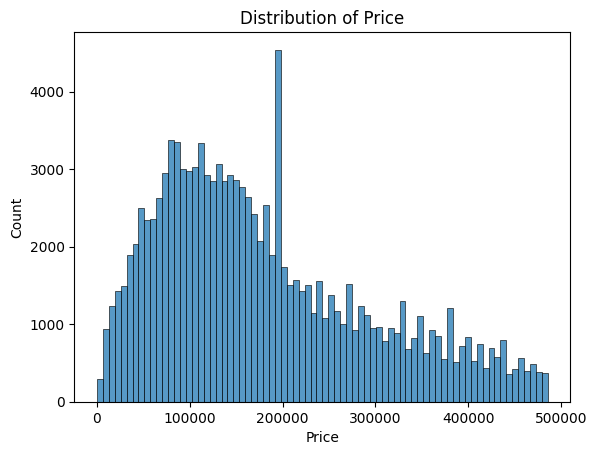

In [7]:
sns.histplot(eda_data["price_in_usd"])
plt.title("Distribution of Price")
plt.xlabel("Price");

#### Checking the distribution of other columns

IndexError: index 6 is out of bounds for axis 0 with size 6

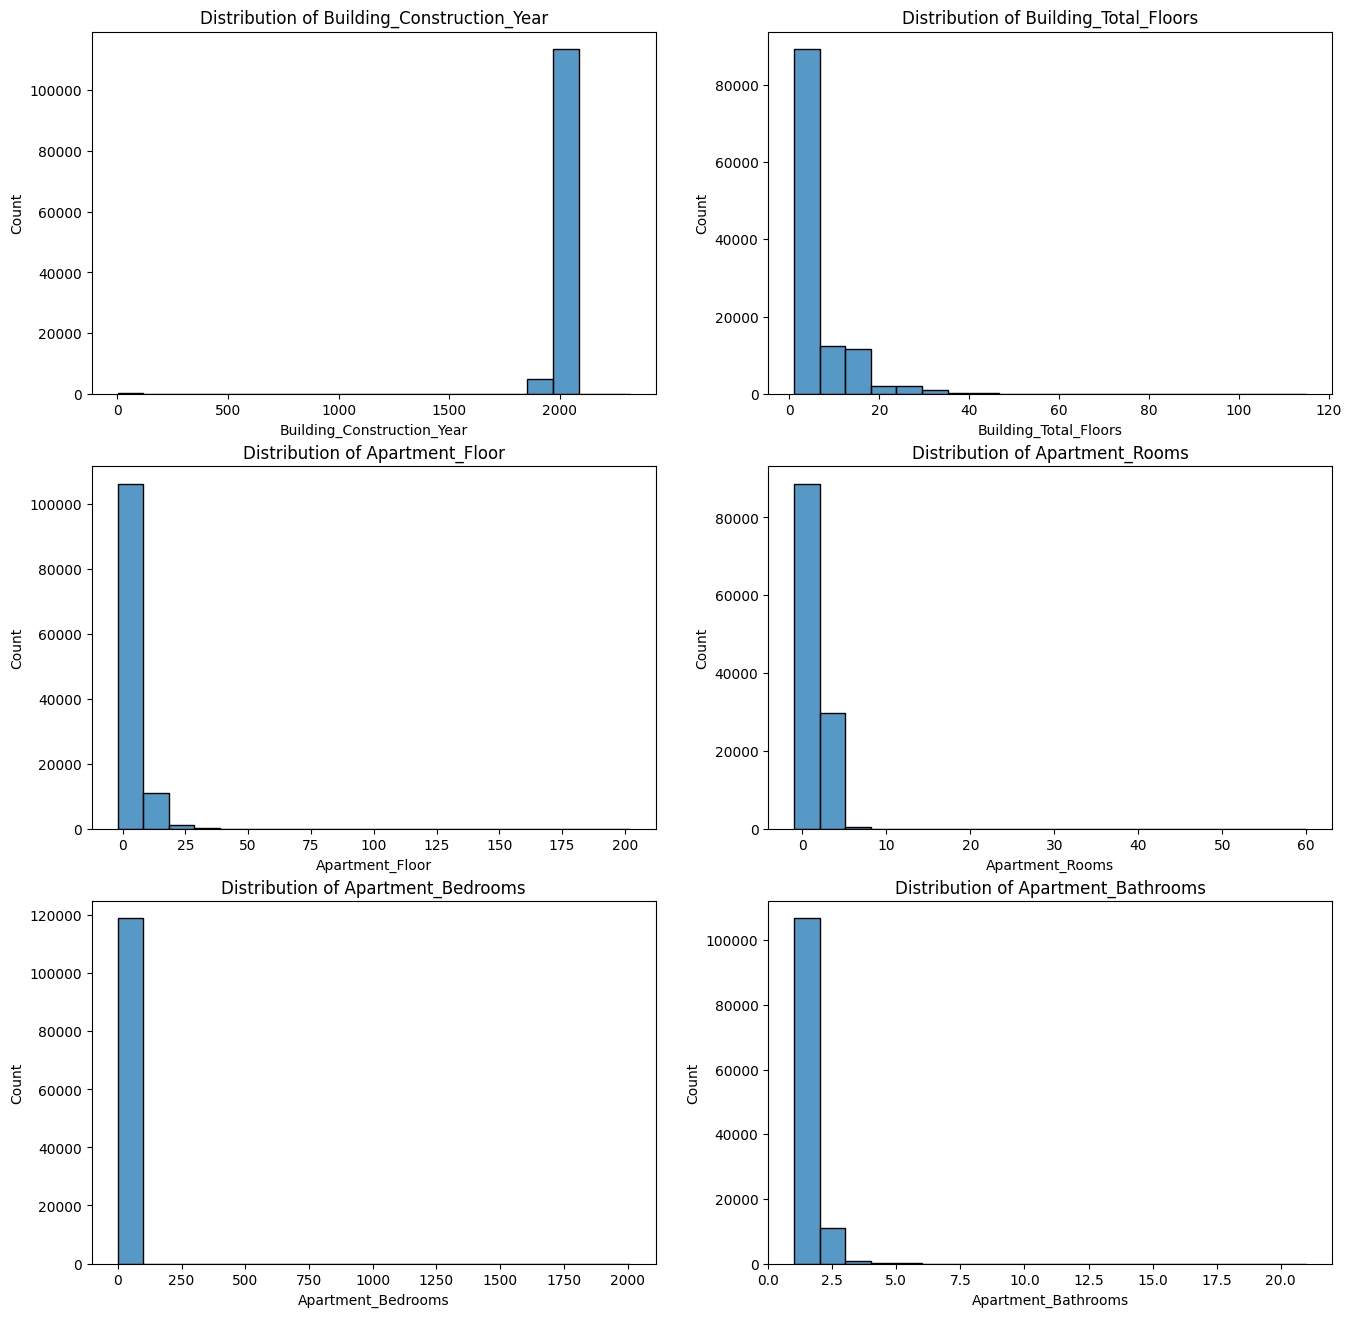

In [8]:
num_col = eda_data.select_dtypes(include="number")
# discorvered my data set is not up to 6 as asigned in the suplot so, i decided to slice/index it before iterating it
num_col_subset = num_col[:6]
# Create suplots
_, ax = plt.subplots(3, 2, figsize=(16, 16))
ax = ax.ravel() # Convert 2D axes array to 1D array

for ax_idx, col in enumerate(num_col_subset): # Generate suplots asigning the sliced variable
    sns.histplot(eda_data[col], ax=ax[ax_idx], bins=20)

    # Label plot title and axis
    ax[ax_idx].set_title(f"Distribution of {col.title()}")
    ax[ax_idx].set_xlabel(f"{col.title()}")

**since the index of the data set is in odd form, it throws error because the assigned subplots is 3 x 2 whix is 6 all together**

**Acording to this plots, years of the building start aproximately from 1995 to 2030 and that is the highest of the rest of the years.**
**Building total floor start approximately from 1 to 18 which are the highest in the distribution of the building floor.**
**Number od room starts from 1 to 4 and that is the highest under that distribution**
**Apartment bed-rooms start from 1 to 5 too which are the highest in their own distribution**
**Apartment bathroom starts from 1 to 5 too which are the highest under their distribution**

#### Check distribution of categorical columns

In [ ]:
cat_col = eda_data.select_dtypes(exclude="number")
cat_col

In [ ]:
for col in cat_col:
    print(f"====={col.title()}======")
    print(f"Number of Unique {col.title()}:", eda_data[col].nunique())
    counts = eda_data[col].value_counts()
    print(counts)
    
    if len(counts) > 11:
        merged_counts = counts.head(10)
        merged_counts.loc["other"] = counts.iloc[10:].sum()
        counts = merged_counts

    plt.figure(figsize=(16, 5))
    sns.barplot(counts)
    plt.title(f"Distribution of {col.title()}")
    plt.xlabel(f"{col.title()}")
    plt.show()

In [ ]:
for col in num_col:
    # 1. Calculate the grouped average
    group_average = eda_data.groupby("price_in_usd")[col].mean()

    # 2. Print the Series (this is why you see the 'dataframe')
    print(group_average)

    # 3. Convert the Series back to a DataFrame for easier plotting
    plot_data = group_average.reset_index()
    
    # 4. Explicitly map the columns to x and y in sns.barplot
    sns.histplot(x=col, y="price_in_usd", data=plot_data)

    plt.title(f"Average {col.title()} by price (USD)")
    plt.xlabel("Price in USD") # Good practice to label the axes
    plt.ylabel(f"Average {col.title()}")
    plt.show()

In [ ]:
for col in cat_columns:
    # 1. Calculate the grouped average: Average price (numerical) for each category (text)
    # The result is a Series where the index is the category and the values are the average price.
    group_average_price = eda_data.groupby(col)["price_in_USD"].mean()

    # 2. Print the Series (Optional, remove if you only want the chart)
    print(f"\nAverage Price by {col.title()}:")
    print(group_average_price)

    # 3. Convert the Series to a DataFrame for plotting, setting the index as a column
    plot_data = group_average_price.reset_index()
    
    # 4. Create the Bar Plot
    # The x-axis is the categorical column (e.g., 'Brand', 'Color').
    # The y-axis is the calculated average price in USD.
    plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
    sns.barplot(x=col, y="price_in_USD", data=plot_data)

    plt.title(f"Average Price (USD) by {col.title()}")
    plt.xlabel(col.title())
    plt.ylabel("Average Price in USD")
    plt.xticks(rotation=45, ha='right') # Rotate labels if category names are long
    plt.tight_layout() # Ensures labels don't get cut off
    plt.show()

## Discorveries

**The major influence the data set has comes from the number of room which to say from the hisplot, 2-bed-room has the highest. Based on price, from the hisplot also, prices below $210000 is the highest.**
**Turky has the highest granking in number**
**Villa and aprtments also has highest in the ranking**